## Regularization parameter: Ridge and Lasso Regression

Create a plot below of how $R^2$ varies across different values of $\lambda$ for ridge and lasso regression. Use logic and code similar to the ridge regression demonstration above, and base your plot on the X_train2 feature set.

Do lasso and ridge yield the same $R^2$ for a given lambda value?

Submit your work and discuss the results with your mentor.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [2]:
# Load the data.
df = pd.read_csv(
    'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv'
).iloc[:,1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Make some new features to capture potential quadratic and cubic
# relationships between solar radiation and day or temperature.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]


In [3]:
#Run the large lasso model.
lassBig = linear_model.Lasso(alpha=.35)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))



R² for the model with many features:
0.443633767129


In [4]:
# Run the large ridge model.

ridgeregrBig = linear_model.Ridge(alpha=10, fit_intercept=False)
ridgeregrBig.fit(X_train2, Y_train)
print(ridgeregrBig.score(X_train2, Y_train))


0.573946428961


Now we will run both Ridge and Lasso models for the same datasets, and store the resulting R2 for a set of regularization parameters in the range 0.1 to 10.6. 

**CODING QUESTION: Why does the list R2_lasso need to be populated by np.append(lassBig.score(X_train2, Y_train), [0.35]) outside of the loop? (These are the R2 and lambda values from lass.Big above.) I did this following the model in the Ridge lesson, but I don't understand why it is necessary.

/Users/teresaoneill/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


    Ridge R2  lambda  Lasso R2
0   0.573972     0.1  0.563572
1   0.573971     0.6  0.210159
2   0.573968     1.1  0.004601
3   0.573966     1.6  0.004457
4   0.573963     2.1  0.004311
5   0.573961     2.6  0.004166
6   0.573960     3.1  0.004019
7   0.573958     3.6  0.003873
8   0.573957     4.1  0.003726
9   0.573955     4.6  0.003578
10  0.573954     5.1  0.003430
11  0.573953     5.6  0.003282
12  0.573952     6.1  0.003133
13  0.573951     6.6  0.002983
14  0.573951     7.1  0.002833
15  0.573950     7.6  0.002683
16  0.573949     8.1  0.002532
17  0.573948     8.6  0.002381
18  0.573948     9.1  0.002229
19  0.573947     9.6  0.002077
20  0.573946    10.1  0.001925


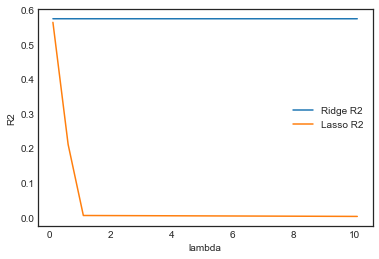

In [5]:
# Your code here

# Store Lasso estimates.
R2_lasso = []
R2_lasso = np.append(lassBig.score(X_train2, Y_train), [.35])

# Store legend information.
labels = []

#Run the lasso model for many alphas.
for lambd in np.arange(0.1, 10.6, 0.5):
    lassBig = linear_model.Lasso(alpha=lambd, fit_intercept=False)
    lassBig.fit(X_train2, Y_train)
    R2_lasso = np.row_stack((
        R2_lasso,
        np.append(lassBig.score(X_train2, Y_train),[lambd])))

R2_ridge = []
R2_ridge = np.append(ridgeregrBig.score(X_train2, Y_train), [10])

#Run the ridge model for many alphas.
for lambd in np.arange(0.1, 10.6, 0.5):
    ridgeregrBig = linear_model.Ridge(alpha=lambd, fit_intercept=False)
    ridgeregrBig.fit(X_train2, Y_train)
    R2_ridge = np.row_stack((
        R2_ridge,
        np.append(ridgeregrBig.score(X_train2, Y_train),[lambd])))

# Make the data pretty.
R2_df_lasso = pd.DataFrame(
    R2_lasso, 
    columns=list(['Lasso R2']) + ['lambda'])

R2_df_ridge = pd.DataFrame(
    R2_ridge, 
    columns=list(['Ridge R2']) + ['lambda'])
R2_df_ridge.sort_values(by='lambda', inplace=True, ascending=True)

#Merge the lasso and ridge R2 values into one dataframe.
R2_df = pd.merge(R2_df_ridge, R2_df_lasso, on='lambda')
R2_df.sort_values(by='lambda', inplace=True, ascending=True)

#Take a look at the results.
print(R2_df)

# Plot a line for each parameter.
varstoplot = list(R2_df[['Ridge R2', 'Lasso R2']])

for var in varstoplot:
    plt.plot(R2_df['lambda'], R2_df[var])
    labels.append(var)
plt.xlabel('lambda')
plt.ylabel('R2')
plt.legend(labels)
plt.show()

## Discussion

The dataframe and plots above show that the R2 value decreases only very slightly as the regularization parameter is increased in ridge regression. On the other hand, in Lasso regression, R2 plummets when the parameter increases. 

Penalizing large coefficients in Ridge regression protects the model from overfitting due to correlated features, where small changes in the features could give unduly variable outputs. Reducing the feature space through Lasso regression is useful for eliminating noise and meaningless features, but in a small feature space such as the credit card dataset modeled above, pushing coefficients to zero when there are so few features leaves the model without anything to work with: hence the sharp drop in R2 values.